In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
df=pd.read_csv(r"/kaggle/input/stroke-data/healthcare-dataset-stroke-data.csv")

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [5]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
df['bmi'].fillna(df['bmi'].median(), inplace=True)
print("Remaining NaN in BMI:", df['bmi'].isnull().sum())

Remaining NaN in BMI: 0


In [7]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [8]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [9]:
df2 = df.drop('id', axis=1, errors='ignore')


In [10]:
categorical_cols = ['gender','ever_married','work_type','Residence_type','smoking_status']

In [11]:
from sklearn.preprocessing import OrdinalEncoder

In [12]:
oe = OrdinalEncoder()
df2[categorical_cols] = oe.fit_transform(df2[categorical_cols])

In [13]:
df2

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,67.0,0,1,1.0,2.0,1.0,228.69,36.6,1.0,1
1,0.0,61.0,0,0,1.0,3.0,0.0,202.21,28.1,2.0,1
2,1.0,80.0,0,1,1.0,2.0,0.0,105.92,32.5,2.0,1
3,0.0,49.0,0,0,1.0,2.0,1.0,171.23,34.4,3.0,1
4,0.0,79.0,1,0,1.0,3.0,0.0,174.12,24.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0.0,80.0,1,0,1.0,2.0,1.0,83.75,28.1,2.0,0
5106,0.0,81.0,0,0,1.0,3.0,1.0,125.20,40.0,2.0,0
5107,0.0,35.0,0,0,1.0,3.0,0.0,82.99,30.6,2.0,0
5108,1.0,51.0,0,0,1.0,2.0,0.0,166.29,25.6,1.0,0


In [14]:
df2[categorical_cols] = df2[categorical_cols].astype(int)

In [15]:
df2.dtypes

gender                 int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
dtype: object

In [16]:
df2['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [17]:
from sklearn.utils import resample


In [18]:
df_major = df2[(df2['stroke']==0)]
df_minor = df2[(df2['stroke']==1)]
df_minor_resmapled = resample(df_minor,replace=True,n_samples=4861,random_state=42)
df_resampled = pd.concat([df_minor_resmapled,df_major])

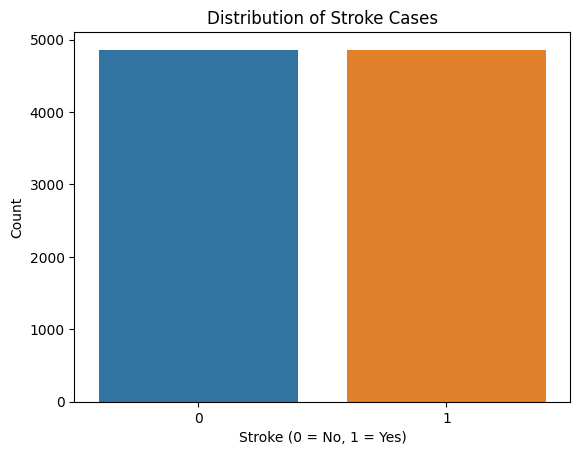

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='stroke', data=df_resampled)
plt.title('Distribution of Stroke Cases')
plt.xlabel('Stroke (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

<Axes: >

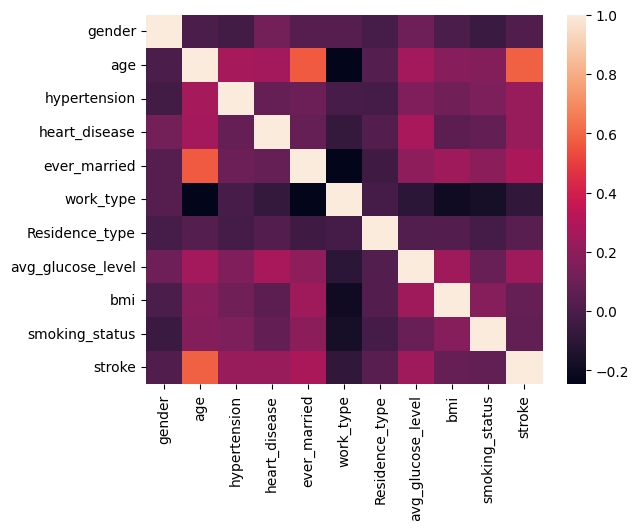

In [20]:
sns.heatmap(df_resampled.corr(), fmt='.2g')

In [21]:
x = df_resampled.iloc[:,:-1]
y = df_resampled['stroke']

In [22]:
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
from sklearn.metrics import accuracy_score
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=7)

In [23]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [24]:
print("Accuracy Score :",round(dtc.score(x_test,y_test)*100,2),"%")

Accuracy Score : 96.97 %


In [25]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [26]:
print("Accuracy Score :",round(rfc.score(x_test,y_test)*100,2),"%")

Accuracy Score : 99.02 %


In [27]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [28]:
print("Accuracy Score :",round(lr.score(x_test,y_test)*100,2),"%")

Accuracy Score : 76.5 %


In [29]:
#importing classification report and confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix

In [30]:
y_pred = lr.predict(x_test)
print("Classification report - \n",classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.79      0.74      0.76       988
           1       0.74      0.80      0.77       957

    accuracy                           0.77      1945
   macro avg       0.77      0.77      0.76      1945
weighted avg       0.77      0.77      0.76      1945



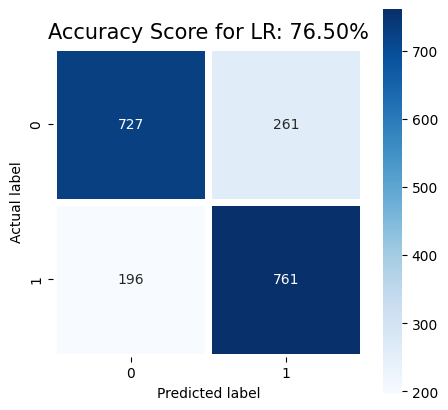

In [31]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',           # <<< forces integer format
    linewidths=5,
    square=True,
    cmap='Blues'
)

plt.xlabel("Predicted label")
plt.ylabel("Actual label")

all_sample_title = 'Accuracy Score for LR: {:.2f}%'.format(lr.score(x_test, y_test) * 100)
plt.title(all_sample_title, size=15)

plt.show()


In [32]:
y_pred = rfc.predict(x_test)
print('Classification Report for rf- \n',classification_report(y_test,y_pred))

Classification Report for rf- 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       988
           1       0.98      1.00      0.99       957

    accuracy                           0.99      1945
   macro avg       0.99      0.99      0.99      1945
weighted avg       0.99      0.99      0.99      1945



Text(0.5, 1.0, 'rf Accuracy Score 99.02313624678663')

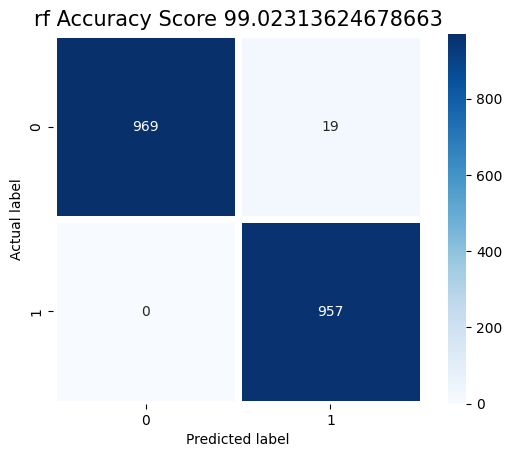

In [33]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(data=cm,linewidths=5,annot=True,square=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
all_sample_title = 'rf Accuracy Score {0}'.format(rfc.score(x_test,y_test)*100)
plt.title(all_sample_title,size=15)     

In [34]:
y_pred = dtc.predict(x_test)
print('Classification Report for dt- \n',classification_report(y_test,y_pred))

Classification Report for dt- 
               precision    recall  f1-score   support

           0       1.00      0.94      0.97       988
           1       0.94      1.00      0.97       957

    accuracy                           0.97      1945
   macro avg       0.97      0.97      0.97      1945
weighted avg       0.97      0.97      0.97      1945



Text(0.5, 1.0, 'for dt Accuracy Score 96.96658097686375')

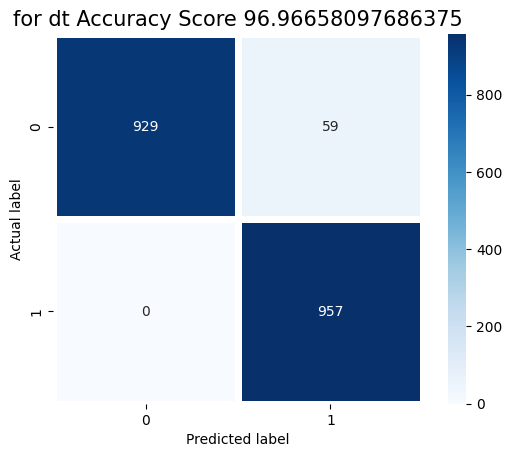

In [35]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(data=cm,linewidths=5,annot=True,square=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
all_sample_title = 'for dt Accuracy Score {0}'.format(dtc.score(x_test,y_test)*100)
plt.title(all_sample_title,size=15)     

In [36]:
from sklearn.svm import SVC

svm_model = SVC()     # default SVM (RBF kernel)
svm_model.fit(x_train, y_train)


,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [37]:
print("Accuracy Score :", round(svm_model.score(x_test, y_test) * 100, 2), "%")


Accuracy Score : 76.3 %


In [ ]:
y_pred = dtc.predict(x_test)
print('Classification Report for dt- \n',classification_report(y_test,y_pred))

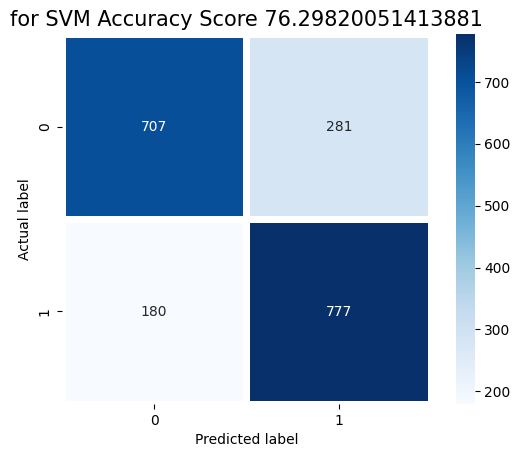

In [38]:
# Predictions
y_pred_svm = svm_model.predict(x_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svm)

sns.heatmap(
    data=cm,
    linewidths=5,
    annot=True,
    square=True,
    fmt='d',
    cmap='Blues'
)

plt.xlabel('Predicted label')
plt.ylabel('Actual label')

all_sample_title = 'for SVM Accuracy Score {0}'.format(svm_model.score(x_test, y_test) * 100)
plt.title(all_sample_title, size=15)

plt.show()


In [53]:
y_pred_svm = svm_model.predict(x_test)
print("Classification Report for SVM - \n", classification_report(y_test, y_pred_svm))


Classification Report for SVM - 
               precision    recall  f1-score   support

           0       0.80      0.72      0.75       988
           1       0.73      0.81      0.77       957

    accuracy                           0.76      1945
   macro avg       0.77      0.76      0.76      1945
weighted avg       0.77      0.76      0.76      1945



In [39]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()      # default Naive Bayes
nb_model.fit(x_train, y_train)


,priors,None
,var_smoothing,1e-09


In [40]:
print("Accuracy Score :", round(nb_model.score(x_test, y_test) * 100, 2), "%")


Accuracy Score : 76.2 %


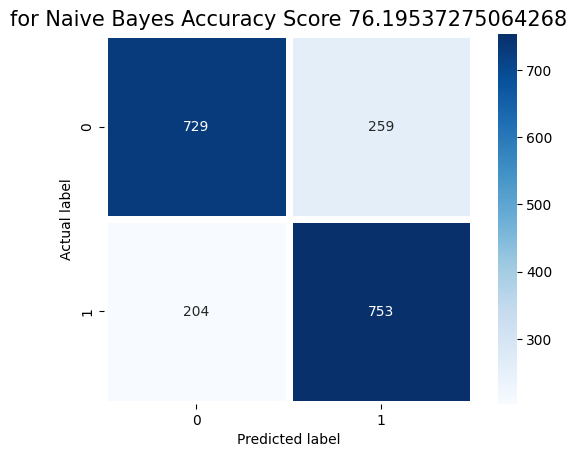

In [41]:
# Predictions
y_pred_nb = nb_model.predict(x_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_nb)

sns.heatmap(
    data=cm,
    linewidths=5,
    annot=True,
    square=True,
    fmt='d',
    cmap='Blues'
)

plt.xlabel('Predicted label')
plt.ylabel('Actual label')

all_sample_title = 'for Naive Bayes Accuracy Score {0}'.format(nb_model.score(x_test, y_test) * 100)
plt.title(all_sample_title, size=15)

plt.show()


In [54]:
y_pred_nb = nb_model.predict(x_test)
print("Classification Report for Naive Bayes - \n", classification_report(y_test, y_pred_nb))


Classification Report for Naive Bayes - 
               precision    recall  f1-score   support

           0       0.78      0.74      0.76       988
           1       0.74      0.79      0.76       957

    accuracy                           0.76      1945
   macro avg       0.76      0.76      0.76      1945
weighted avg       0.76      0.76      0.76      1945



2025-11-14 18:19:54.990612: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763144395.012493    4627 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763144395.019148    4627 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

I0000 00:00:1763144400.333464    4627 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Epoch 1/100


I0000 00:00:1763144402.339697    4678 service.cc:148] XLA service 0x7d3e9800b610 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1763144402.339732    4678 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1763144402.550462    4678 cuda_dnn.cc:529] Loaded cuDNN version 90300


 74/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5044 - loss: 5.0695

I0000 00:00:1763144403.796691    4678 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


195/195 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.5185 - loss: 3.5475 - val_accuracy: 0.7063 - val_loss: 0.5870
Epoch 2/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5934 - loss: 0.7801 - val_accuracy: 0.7461 - val_loss: 0.6007
Epoch 3/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6279 - loss: 0.6691 - val_accuracy: 0.7648 - val_loss: 0.6136
Epoch 4/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6367 - loss: 0.6543 - val_accuracy: 0.7134 - val_loss: 0.5902
Epoch 5/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6514 - loss: 0.6426 - val_accuracy: 0.7545 - val_loss: 0.5798
Epoch 6/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6836 - loss: 0.5963 - val_accuracy: 0.7699 - val_loss: 0.5382
Epoch 7/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6760 - loss: 0.6072 - val_accuracy: 0.7564 - val_loss: 0.5567
Epoch 8/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6917 - loss: 0.5829 - val_accuracy: 0.761

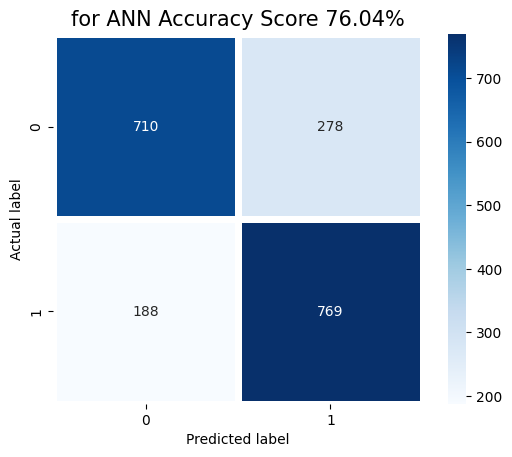

In [42]:
# ============================
#  OPTIMIZED ANN IMPLEMENTATION
# ============================

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ----------------------------
# Build the ANN Model
# ----------------------------
ann = Sequential()

ann.add(Dense(32, activation='relu', input_shape=(x_train.shape[1],)))
ann.add(Dropout(0.2))

ann.add(Dense(16, activation='relu'))
ann.add(Dropout(0.2))

ann.add(Dense(8, activation='relu'))

ann.add(Dense(1, activation='sigmoid'))   # Output layer

# ----------------------------
# Compile the Model
# ----------------------------
ann.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy'])

# ----------------------------
# Early Stopping
# ----------------------------
es = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# ----------------------------
# Train the Model
# ----------------------------
ann.fit(
    x_train,
    y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[es],
    verbose=1
)

# ----------------------------
# Predictions
# ----------------------------
y_pred_ann = (ann.predict(x_test) > 0.5).astype("int32")

# ----------------------------
# Accuracy
# ----------------------------
acc_ann = ann.evaluate(x_test, y_test, verbose=0)[1] * 100
print("Accuracy Score :", round(acc_ann, 2), "%")

# ----------------------------
# Confusion Matrix
# ----------------------------
cm = confusion_matrix(y_test, y_pred_ann)

sns.heatmap(
    data=cm,
    linewidths=5,
    annot=True,
    square=True,
    fmt='d',
    cmap='Blues'
)

plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title("for ANN Accuracy Score {:.2f}%".format(acc_ann), size=15)
plt.show()


In [55]:
from sklearn.metrics import classification_report

print("Classification Report for ANN - \n", classification_report(y_test, y_pred_ann))



Classification Report for ANN - 
               precision    recall  f1-score   support

           0       0.79      0.72      0.75       988
           1       0.73      0.80      0.77       957

    accuracy                           0.76      1945
   macro avg       0.76      0.76      0.76      1945
weighted avg       0.76      0.76      0.76      1945



Epoch 1/50
244/244 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6905 - loss: 0.5957
Epoch 2/50
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9815 - loss: 0.3254
Epoch 3/50
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9952 - loss: 0.2355
Epoch 4/50
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9989 - loss: 0.1945
Epoch 5/50
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.1593
Epoch 6/50
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.1312
Epoch 7/50
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9998 - loss: 0.1151
Epoch 8/50
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9999 - loss: 0.0967
Epoch 9/50
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.0845
Epoch 10/50
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.0726
Epoch 11/50
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.0627
Epoch 12/50
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

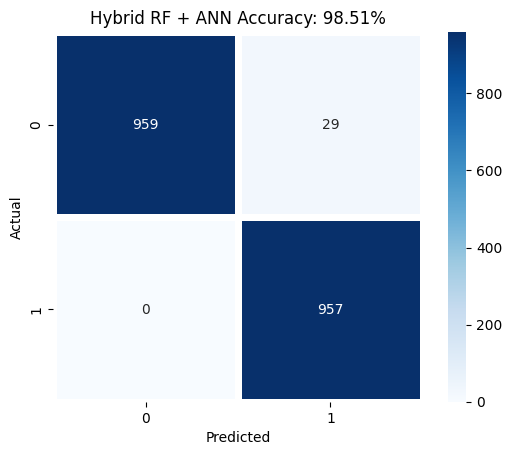

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ============================================
# 1. Train Random Forest (Base Model)
# ============================================

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(x_train, y_train)

# RF predicted probabilities (important!)
rf_train_pred = rf.predict_proba(x_train)[:, 1]   # for ANN input
rf_test_pred = rf.predict_proba(x_test)[:, 1]

# Reshape inputs for ANN
rf_train_pred = np.array(rf_train_pred).reshape(-1, 1)
rf_test_pred = np.array(rf_test_pred).reshape(-1, 1)

# ============================================
# 2. Build ANN (Meta Model)
# ============================================

ann = Sequential()
ann.add(Dense(16, activation='relu', input_shape=(1,)))
ann.add(Dropout(0.2))
ann.add(Dense(8, activation='relu'))
ann.add(Dense(1, activation='sigmoid'))

ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# ============================================
# 3. Train ANN on RF outputs
# ============================================

ann.fit(rf_train_pred, y_train, epochs=50, batch_size=32, verbose=1)

# ============================================
# 4. Predictions (Hybrid Output)
# ============================================

y_pred_hybrid = (ann.predict(rf_test_pred) > 0.5).astype(int)

# ============================================
# 5. Evaluation
# ============================================

# Accuracy
hybrid_acc = (y_pred_hybrid.flatten() == y_test).mean() * 100
print("Hybrid RF + ANN Accuracy:", round(hybrid_acc, 2), "%")

# Classification report
print("\nClassification Report for RF + ANN:\n")
print(classification_report(y_test, y_pred_hybrid))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_hybrid)

sns.heatmap(
    data=cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    square=True,
    linewidths=5
)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Hybrid RF + ANN Accuracy: {:.2f}%".format(hybrid_acc))
plt.show()


In [51]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [5, 5],
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(x_train, y_train)
grid.best_params_

{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}

In [52]:
print("Best Accuracy Score after tuning is: ",(grid.best_score_*100).round(2))

Best Accuracy Score after tuning is:  98.95
